<a href="https://colab.research.google.com/github/Adreena33/Projectentri/blob/main/Census_income_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 2: Load dataset
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                 names=columns, na_values=' ?', skipinitialspace=True)

In [3]:
# Step 3: Basic Data Exploration
def data_explore(df):
    print("Shape:", df.shape)
    print("Data Types:\n", df.dtypes)
    print("\nNumerical Columns:", df.select_dtypes(include=['int64', 'float64']).columns.tolist())
    print("Categorical Columns:", df.select_dtypes(include='object').columns.tolist())

data_explore(df)


Shape: (32561, 15)
Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Numerical Columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical Columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [4]:
# Step 4: Check and Handle Missing Values
def data_check(df):
    missing_percent = df.isna().mean() * 100
    print("\nMissing Values (%):\n", missing_percent[missing_percent > 0])

data_check(df)
# Drop rows with missing values
df.dropna(inplace=True)


Missing Values (%):
 Series([], dtype: float64)


In [5]:
# Step 5: Remove Duplicates
df.drop_duplicates(inplace=True)

In [15]:
import pandas as pd

def detect_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Select numeric columns
    outliers = {}

    for col in numeric_cols:
        # Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR (Interquartile Range)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers (values outside the bounds)
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return outliers

# Example of how to use it
outliers = detect_outliers_iqr(df)  # Assuming 'df' is your DataFrame
for column, outlier_data in outliers.items():
    print(f"Outliers for column {column}:")
    print(outlier_data)


Outliers for column age:
            age  workclass    fnlwgt  education  education_num  \
100    3.155464   0.095541 -0.649084   0.535927       1.744070   
316    3.238613   1.560547 -0.482313   1.254901      -0.114451   
3297   3.155464  -2.834472 -1.751131   0.176440      -0.579081   
4196   3.155464   0.828044 -0.688070  -1.620994      -2.437602   
4613   3.238613  -2.834472  0.599179  -1.620994      -2.437602   
5294   3.238613  -2.834472 -0.551052   0.535927       1.744070   
6300   3.238613   1.560547  0.330620   1.254901      -0.114451   
8536   3.238613   0.828044  0.132224   1.254901      -0.114451   
9735   3.321762   0.095541 -0.005471   0.535927       1.744070   
10787  3.155464   0.095541 -0.740824   0.176440      -0.579081   
13210  3.238613   0.095541 -0.721348  -0.542533       1.279439   
17027  3.321762   0.828044  0.649705   0.176440      -0.579081   
17314  3.155464  -2.834472 -1.101937   1.254901      -0.114451   
19085  3.155464   0.095541 -0.630791  -0.542533    

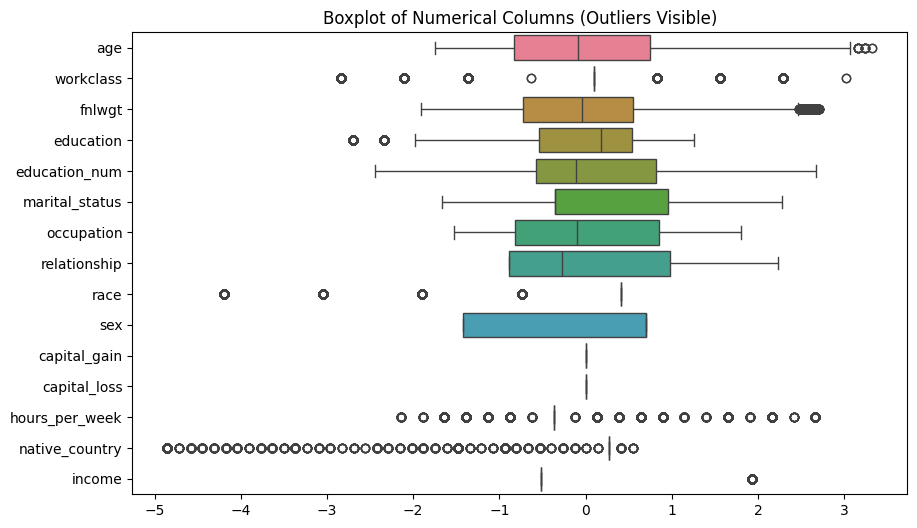

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for the numerical columns
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Numerical Columns (Outliers Visible)')
plt.show()


In [6]:
# Step 6: Remove Outliers using IQR
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print("\nOutliers removed using IQR method.")
    return df

df = remove_outliers_iqr(df)


Outliers removed using IQR method.


In [7]:
# Step 7: Label Encoding for Categorical Columns
def label_encoding(df):
    label_encoder = LabelEncoder()
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = label_encoder.fit_transform(df[col])
    print("\nCategorical columns encoded.")

label_encoding(df)


Categorical columns encoded.


In [8]:
# Step 8: Feature Scaling
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [9]:
# Step 9: Show final shape
print("Final dataset shape after preprocessing:", df.shape)

Final dataset shape after preprocessing: (18991, 15)


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
correlation_matrix = df.corr()


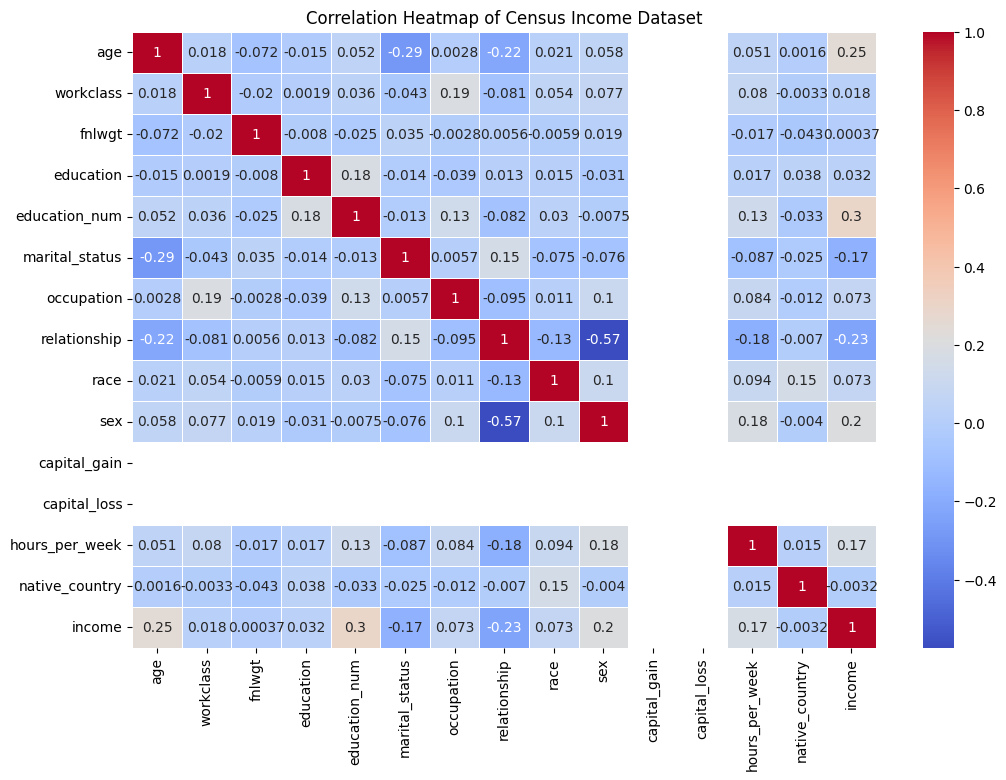

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Census Income Dataset")
plt.show()
